<a href="https://colab.research.google.com/github/Daisuke0209/sparse_modeling/blob/master/190420_total_variation_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#一般化LASSOを解くためのADMMアルゴリズム
ADMM(Alternating Direction Method of Multipliers)

## Google Driveとのマウントを取る

In [1]:
#Google Driveのマウントを取る
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## ライブラリのインポート

In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *

## レナさん画像の読み込み

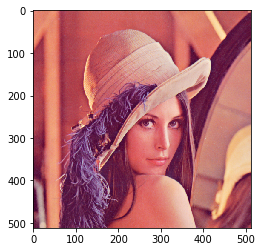

In [16]:
image = Image.open('/content/gdrive/My Drive/Datasets/color/lena.png')
im = np.asarray(image)
l=512
plt.imshow(im)
pil_img = Image.fromarray(im)
pil_img.convert("RGB").save("lena.jpg","JPEG")

## 画像のモノクロ化

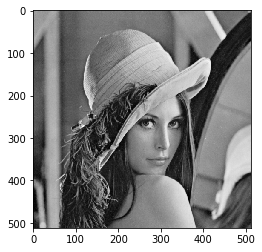

In [19]:
im_gray = 0.299 * im[:, :, 0] + 0.587 * im[:, :, 1] + 0.114 * im[:, :, 2]
plt.gray()
plt.imshow(im_gray)
pil_img = Image.fromarray(im_gray)
pil_img.convert("RGB").save("lena_gray.jpg","JPEG")

## レナさん画像にノイズ付与

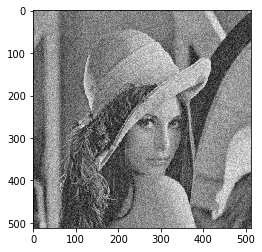

In [18]:
for i in range(l):
  for j in range(l):
    im_gray[i][j]=im_gray[i][j]+randint(50)
plt.gray()
plt.imshow(im_gray)
pil_img = Image.fromarray(im_gray)
pil_img.convert("RGB").save("lena_gray_noise.jpg","JPEG")

## ADMMアルゴリズム

### $\Phi$の設定
$\Phi$は単位行列を設定

In [20]:
Phi=np.eye(l)
Phi

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### ソフト閾値関数の定義

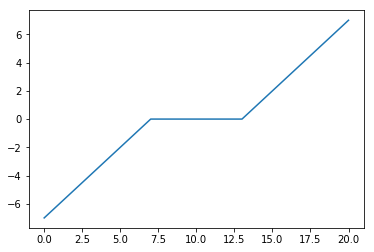

In [21]:
def st(lam,v):
  l=len(v)
  sv=np.zeros(l)
  for i in range(l):
    if abs(v[i])<=lam:
      sv[i]=0
    else:
      if v[i]>0:
        sv[i]=v[i]-lam
      elif v[i]<=0:
        sv[i]=v[i]+lam
        
  return sv

a=np.arange(-10,11)
plt.plot(st(3,a))

### $\Psi$の設定

In [22]:
Psi=-np.eye(l)
for i in range(l):
  for j in range(l):
    if j==i+1:
      Psi[i][j]=1
Psi

array([[-1.,  1., -0., ..., -0., -0., -0.],
       [-0., -1.,  1., ..., -0., -0., -0.],
       [-0., -0., -1., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -1.,  1., -0.],
       [-0., -0., -0., ..., -0., -1.,  1.],
       [-0., -0., -0., ..., -0., -0., -1.]])

### 各種パラメータの設定
lamを大きくすると、ノイズ除去したあとの画像のピクセル間の変動が抑えられる。あまり大きくし過ぎると"のっぺり"した画像になってしまう

In [0]:
lam=100
gamma=1
N=10
X_re = np.zeros_like(Psi)
z=np.zeros(l)
v=np.zeros(l)
M=np.dot(Phi.T,Phi)+np.dot(Psi.T,Psi)/gamma
inv_M=np.linalg.inv(M)

## ADMMアルゴリズムの実行

In [24]:
for i in range(l):
  if i%50==0:
    print('%.d列終わり'%i)
  y=im_gray[:,i]
  w=np.dot(Phi.T,y)
  for j in range(N):
    x=np.dot(inv_M,w+np.dot(Psi.T,z-v)/gamma)
    p=np.dot(Psi,x)+v
    z=st(gamma*lam,p)
  X_re[:,i]=x

0列終わり
50列終わり
100列終わり
150列終わり
200列終わり
250列終わり
300列終わり
350列終わり
400列終わり
450列終わり
500列終わり


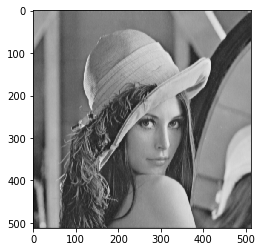

In [25]:
plt.gray()
plt.imshow(X_re,vmin = 0, vmax = 255)
pil_img = Image.fromarray(X_re)
pil_img.convert("RGB").save("lena_gray_denoise.jpg","JPEG")

In [0]:
plt.gray()
plt.imshow(im_gray,vmin = 0, vmax = 255)